# Question 1

## part (a)

Create a data frame that is a subset of the Teams data frame that contains only the years from 2000 through 2009 and the variables yearID, W, and L.

In [ ]:
import pandas as pd

# import the data
teams = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/Teams.csv")

# create a subset containing years 2000 through 2009 and variables yearID, W, and L
sub_teams = teams[teams["yearID"] >= 2000][teams["yearID"] <= 2009]
sub_teams = sub_teams[["yearID", "W", "L"]]
sub_teams.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,yearID,W,L
2325,2000,82,80
2326,2000,85,77
2327,2000,95,67
2328,2000,74,88
2329,2000,85,77


## part (b)

How many years did the Chicago Cubs (team ID is “CHN”) hit at least 200 HRs in a season and what was the median number of wins in those seasons.

In [ ]:
from statistics import median

# subset dataset where team is cubs and home runs is at least 200
cubs = teams[teams["teamID"] == "CHN"][teams["HR"] >= 200]

# years cubs hit at least 200 home runs
print(cubs.shape[0])

# median number of wins
print(median(cubs['W']))

7
84


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


## part (c)

Create a factor called election that divides the yearID into 4-year blocks that correspond to U.S. presidential terms. The first presidential term started in 1788. They each last 4 years and are still on the schedule set in 1788. During which term have the most home runs been hit?

In [ ]:
import math

# create a new column for presidential term
# subtract year 1787, divide by 4, and round up
pres_terms = []
for year in teams["yearID"]:
  pres_terms.append(math.ceil((year - 1787)/4))

teams["pres_term"] = pres_terms

# find total runs grouped by presidential term
most_runs = teams[["pres_term","HR"]].groupby("pres_term").sum()

# find the presidential term with max home runs
most_runs[most_runs["HR"] == max(most_runs["HR"])]

,HR
pres_term,
58,24076


## part (d)

Make a line plot of total home runs per season and stratify by league. Remove observations where league is missing.

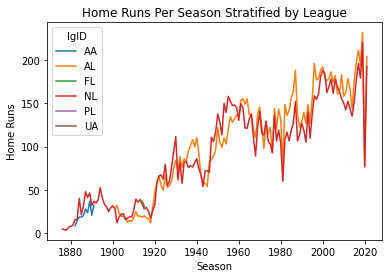

In [ ]:
# drop lgID NA's
teams = teams[teams['lgID'].notna()]

# create line plot
pd.pivot_table(teams.reset_index(),
               index='yearID', columns='lgID', values='HR'
              ).plot(subplots=False, title = "Home Runs Per Season Stratified by League", xlabel = "Season", ylabel = "Home Runs")

## part (e)

Create an indicator variable called “winning record” which is defined as TRUE if the number of wins is greater than the number of losses and FALSE otherwise. Plot a scatter plot of Runs (R) vs Runs against (RA) with the color of each point showing whether that team had a winning record or not.

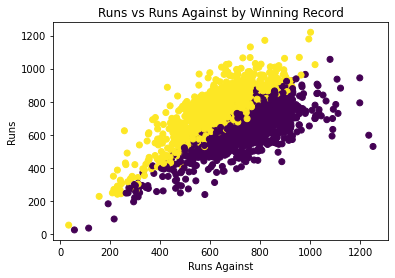

In [ ]:
import matplotlib.pyplot as plt

# function to determine if the team had a winning record or not
def label_record(row):
  if row['W'] > row['L']:
    return True
  else:
    return False

teams["winning_record"] = teams.apply (lambda row: label_record(row), axis=1)

# create scatter plot
plt.scatter(teams['RA'], teams['R'], c = teams['winning_record'])
plt.xlabel("Runs Against")
plt.ylabel("Runs")
plt.title("Runs vs Runs Against by Winning Record")
plt.show()

# Question 2

## part (a)

What month had the highest proportion of cancelled flights? What month had the lowest? Interpret any seasonal patterns.

In [ ]:
import math 

# import the data
flights = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/flights.csv")

# create column for whether flight was cancelled or not
def cancelled(row):
  if math.isnan(row['air_time']):
    return 1
  else:
    return 0

flights["cancelled"] = flights.apply (lambda row: cancelled(row), axis=1) 
month_cancels = flights[["month","cancelled"]].groupby("month").mean()

# month with maximum cancellations
print(month_cancels[month_cancels["cancelled"] == max(month_cancels["cancelled"])])

# month with minimum cancellations
print(month_cancels[month_cancels["cancelled"] == min(month_cancels["cancelled"])])

       cancelled
month           
2       0.053705
       cancelled
month           
10      0.009381


The Winter months, such as February, have the most cancellations, while October has the least amount of cancellations, perhaps because it is in the Fall

## part (b)

Given that a delay is longer than an hour, what is the average time of the total delay by airport (i.e. origin)

In [ ]:
# subset for delays longer than an hour
long_delays = flights[flights["arr_delay"] > 60]

# average delay by airport
long_delays.groupby("origin").mean()['arr_delay']

origin
EWR    120.080943
JFK    120.008503
LGA    124.083678
Name: arr_delay, dtype: float64

## part (c)

What is the average air time for all flights by carrier? Which carrier has the longest average air time on their flights?


In [ ]:
# drop air_time NA's
flights = flights[flights['air_time'].notna()]

# average air time by carrier
air_times = flights[['carrier', 'air_time']].groupby("carrier").mean()
print(air_times)

# carrier with longest average air time
air_times[air_times["air_time"] == max(air_times["air_time"])]

           air_time
carrier            
9E        86.781601
AA       188.822299
AS       325.617772
B6       151.177173
DL       173.688804
EV        90.076192
F9       229.599119
FL       101.143937
HA       623.087719
MQ        91.180253
OO        83.482759
UA       211.791354
US        88.573799
VX       337.002346
WN       147.824809
YV        65.740809


,air_time
carrier,
HA,623.087719


## part (d)

Keeping only flights that had a delay greater than 0, create a histogram for each month of the delay data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2cbc6048d0>,
      dtype=object)

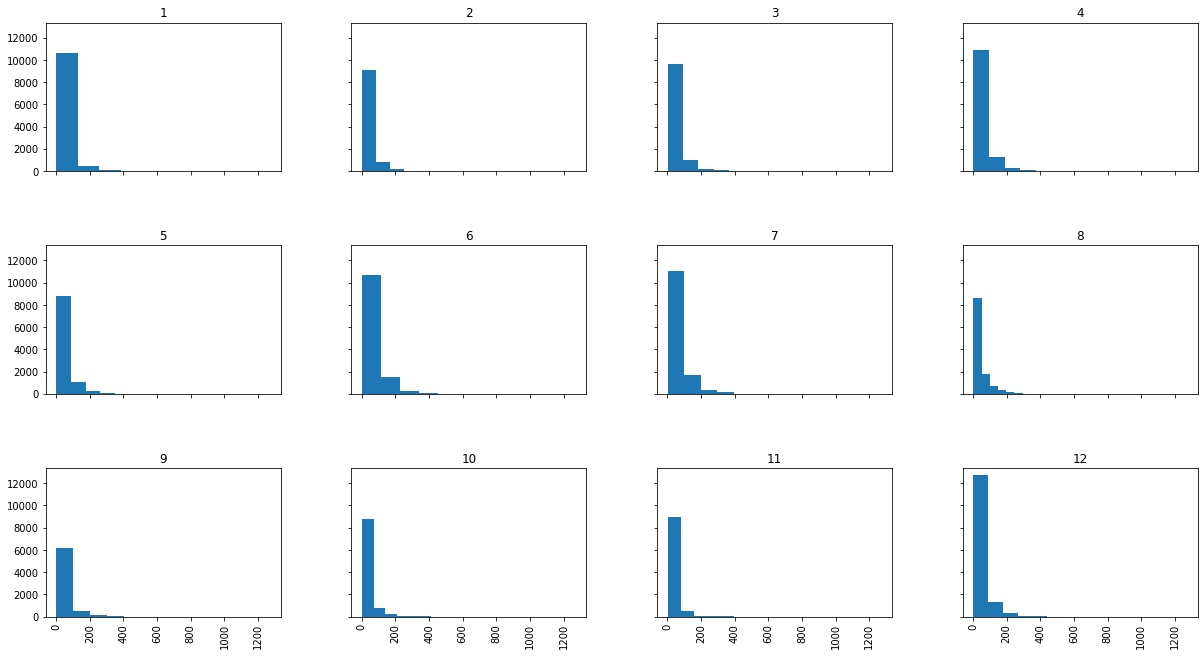

In [ ]:
# subset for delays greater than 0
delays = flights[flights["arr_delay"] > 0]

# create histogram by month
delays['arr_delay'].hist(by = delays['month'], grid = False, figsize=(20,11), layout=(3,4), sharey = True, sharex = True)

## part (e)

Create side-by-side boxplots of delay times for flights with delays 60 minutes or greater for the top 5 airlines in terms of number
of flights

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Delay Time (minutes)')

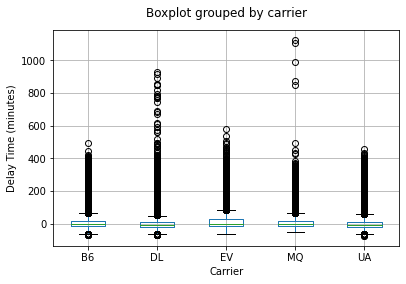

In [ ]:
import operator

# create a dictionary with total flights for each airline
top_airlines = {}
for i in set(long_delays['carrier']):
  top_airlines[i] = list(long_delays['carrier']).count(i)

# sort the dictionary and extract top five airlines
sorted_x = sorted(top_airlines.items(), key=operator.itemgetter(1), reverse = True)
top_carriers = list(dict(sorted_x[0:5]).keys())

# take subset of only top five airlines
airlines = flights.loc[flights['carrier'].isin(top_carriers)]
airlines = airlines[['carrier', 'arr_delay']]

# create boxplot grouped by airline
airlines.boxplot(by='carrier', )
plt.title("")
plt.xlabel("Carrier")
plt.ylabel("Delay Time (minutes)")